In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [6]:
def limit_rc(CE_in,rc):
    index_use = CE_in[:,3] * (1-CE_in[:,4]) <rc
    return CE_in[index_use,:]

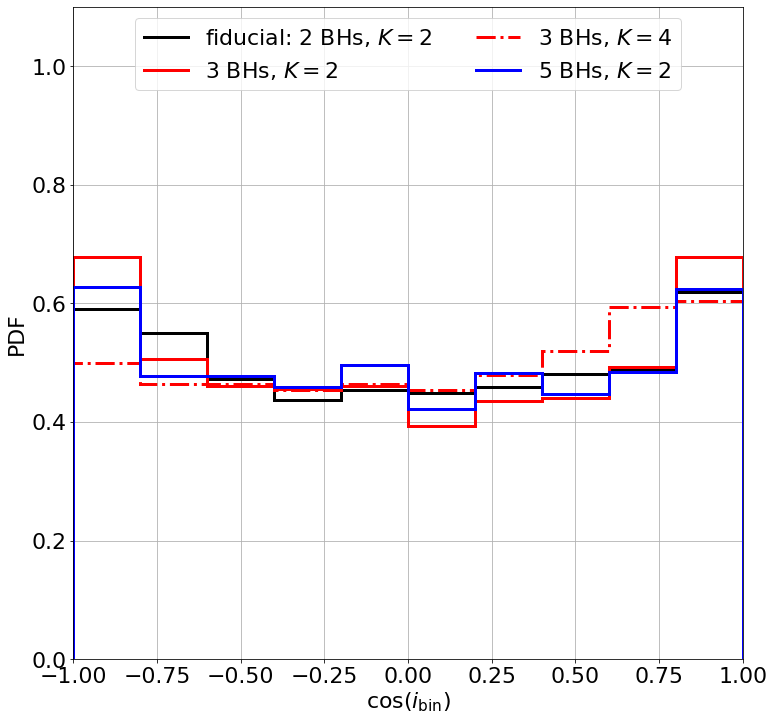

In [7]:
## 
##  Read the data for canonical-X runs
##

RH = (2e-5/3.)**(1./3.)
rc = 0.01*RH

can_CE0 = limit_rc( np.load('../data/can_CE0-2000.npy'), rc)

p3k2 = np.load('../data/NBH3-2K.npy')
p3k4 = np.load('../data/NBH3-4K.npy')
p5k2 = np.load('../data/NBH5-2K.npy')
p5k4 = np.load('../data/NBH5-4K.npy')



##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlim([-1,1])
axs.set_ylim([0.0,1.1])

axs.set_xlabel(r'$\cos(i_{\rm bin})$')
axs.set_ylabel(r'PDF')

# parameters of the plot

bin_use = np.linspace(-1.001,1.001,21)
aluse = 0.03
lw = 3


# plot the distribution of cos(ibin)

eta = can_CE0[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,31)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='k')

eta = p3k2[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='r')

eta = p3k4[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='r',ls='-.')


eta = p5k2[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='b')

#eta = p5k4[:,3:6]
#eta = np.cos(eta[:,2])
#Nuse = len(eta)
#bin_use = np.linspace(-1.001,1.001,21)
#axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
#         edgecolor='b',ls='-.')

#eta = can_CEgw[:,3:6]
#eta = np.cos(eta[:,2])
#Nuse = len(eta)
#bin_use = np.linspace(-1.001,1.001,11)
#axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=False,histtype='step',
#         label=r'$r_{\rm p}$ by Eq.(7)',edgecolor='g')


##  Save the figure
axs.plot([],[],lw=lw,label=r'fiducial: 2 BHs, $K=2$',color='k')
axs.plot([],[],lw=lw,label=r'3 BHs, $K=2$',color='r')
axs.plot([],[],lw=lw,label=r'3 BHs, $K=4$',color='r',ls='-.')
axs.plot([],[],lw=lw,label=r'5 BHs, $K=2$',color='b')
#axs.plot([],[],lw=lw,label=r'5 BHs, initial $K=4$',color='b',ls='-.')
axs.legend(loc=9,ncol=2)
axs.grid()
axs.set_axisbelow(True)


plt.savefig('./pics/pics-PDF-inc-3p.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-PDF-inc-3p.png',bbox_inches='tight',transparent=True)